## Learning Data Augmentation using Flower Classification

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [3]:
data_dir = keras.utils.get_file('flower_photos',origin=dataset_url,  cache_dir='.', untar=True)

228827136/228813984 [==============================] - 10s 0us/step


In [4]:
data_dir

'./datasets/flower_photos'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/1667199972_7ba7d999c1_m.jpg'),
 PosixPath('datasets/flower_photos/roses/24781114_bc83aa811e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/1461381091_aaaa663bbe_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15681454551_b6f73ce443_n.jpg'),
 PosixPath('datasets/flower_photos/roses/20596941736_f2c5f496cf.jpg')]

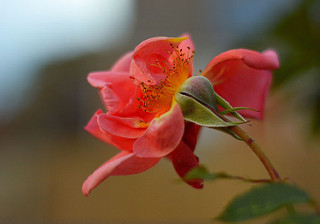

In [8]:
PIL.Image.open(str(roses[3]))

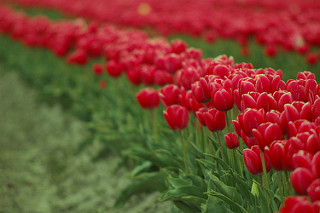

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [10]:
flowers_path_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflower': list(data_dir.glob('sunflower/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

flowers_path_dict.keys()

dict_keys(['roses', 'daisy', 'dandelion', 'sunflower', 'tulips'])

In [11]:
flowers_labels_dict={
    'roses':0,
    'daisy':1, 
    'dandelion':2, 
    'sunflower':3, 
    'tulips':4,
}

## Creating images into numpy arrays using OpenCV

In [12]:
str(flowers_path_dict['roses'][0])

'datasets/flower_photos/roses/1667199972_7ba7d999c1_m.jpg'

In [13]:
img = cv2.imread(str(flowers_path_dict['roses'][0]))
img.shape

(240, 180, 3)

In [14]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [15]:
X,y = [],[]

for flower_name , images in flowers_path_dict.items():
  for single_img in images:
    img = cv2.imread(str(single_img))
    resized_img = cv2.resize(img,(180,180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [16]:
X[0]

array([[[ 81, 122, 171],
        [ 81, 122, 171],
        [ 80, 121, 170],
        ...,
        [ 95, 131, 179],
        [ 95, 131, 179],
        [ 95, 131, 177]],

       [[ 82, 123, 172],
        [ 82, 123, 172],
        [ 82, 123, 172],
        ...,
        [ 96, 132, 179],
        [ 96, 132, 179],
        [ 96, 132, 178]],

       [[ 82, 123, 172],
        [ 82, 123, 172],
        [ 82, 123, 172],
        ...,
        [ 96, 133, 177],
        [ 96, 132, 178],
        [ 96, 132, 178]],

       ...,

       [[ 75, 142, 245],
        [117, 202, 255],
        [ 53, 111, 248],
        ...,
        [ 50,  95, 182],
        [ 24,  64, 238],
        [ 12,  57, 241]],

       [[ 93, 167, 252],
        [126, 217, 246],
        [ 66, 128, 249],
        ...,
        [ 29,  64, 232],
        [ 30,  51, 255],
        [ 55,  92, 247]],

       [[112, 190, 251],
        [ 89, 157, 250],
        [128, 215, 249],
        ...,
        [ 12,  64, 246],
        [ 50,  75, 251],
        [ 93, 130, 244]]

In [17]:
y[:5]

[0, 0, 0, 0, 0]

In [18]:
X = np.array(X)
y = np.array(y)

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [20]:
len(X_train)

2228

In [21]:
len(X_test)

743

## Scaling

In [22]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [23]:
X_train_scaled[0]

array([[[0.36078431, 0.36078431, 0.41568627],
        [0.36862745, 0.36862745, 0.41568627],
        [0.38039216, 0.38039216, 0.41176471],
        ...,
        [0.00392157, 0.02352941, 0.01568627],
        [0.00392157, 0.02352941, 0.01568627],
        [0.01960784, 0.03137255, 0.01568627]],

       [[0.35686275, 0.35686275, 0.41176471],
        [0.35294118, 0.35294118, 0.4       ],
        [0.35294118, 0.36078431, 0.39607843],
        ...,
        [0.01568627, 0.02745098, 0.01960784],
        [0.01568627, 0.02352941, 0.01568627],
        [0.01176471, 0.03137255, 0.01568627]],

       [[0.33333333, 0.34117647, 0.38431373],
        [0.3254902 , 0.32941176, 0.37254902],
        [0.32941176, 0.33333333, 0.37254902],
        ...,
        [0.03529412, 0.03137255, 0.02352941],
        [0.02745098, 0.01960784, 0.01568627],
        [0.01960784, 0.04313725, 0.02352941]],

       ...,

       [[0.02745098, 0.0745098 , 0.0627451 ],
        [0.03137255, 0.07843137, 0.0627451 ],
        [0.03921569, 0

## Model Building

In [24]:
#5 Types of flowers
num_classes = 5

In [25]:
model = Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    #2d array to 1d array
    layers.Flatten(),

    #dense network
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes) #tring default linear activation
])

In [30]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled,y_train,epochs=30)

Epoch 1/30
70/70 [==============================] - 14s 26ms/step - loss: 1.2211 - accuracy: 0.4556
Epoch 2/30
70/70 [==============================] - 2s 23ms/step - loss: 0.9535 - accuracy: 0.6127
Epoch 3/30
70/70 [==============================] - 2s 23ms/step - loss: 0.7422 - accuracy: 0.7020
Epoch 4/30
70/70 [==============================] - 2s 23ms/step - loss: 0.5544 - accuracy: 0.7846
Epoch 5/30
70/70 [==============================] - 2s 23ms/step - loss: 0.3735 - accuracy: 0.8685
Epoch 6/30
70/70 [==============================] - 2s 23ms/step - loss: 0.2235 - accuracy: 0.9268
Epoch 7/30
70/70 [==============================] - 2s 23ms/step - loss: 0.1791 - accuracy: 0.9417
Epoch 8/30
70/70 [==============================] - 2s 23ms/step - loss: 0.0797 - accuracy: 0.9762
Epoch 9/30
70/70 [==============================] - 2s 23ms/step - loss: 0.0398 - accuracy: 0.9892
Epoch 10/30
70/70 [==============================] - 2s 23ms/step - loss: 0.0362 - accuracy: 0.9892
Epoch 11

In [32]:
model.evaluate(X_test_scaled,y_test)

24/24 [==============================] - 1s 20ms/step - loss: 2.7084 - accuracy: 0.6703


[2.7083895206451416, 0.670255720615387]

**Training accuracy is 100%**
**Test_ accuracy is 67.025%**
## The model overfits the training data . Hence we have to deal with it

In [34]:
y_pred = model.predict(X_test_scaled)
y_pred

array([[ -2.512335  ,   1.1892406 ,  13.052739  , -17.830116  ,
         -3.0505574 ],
       [ -0.17911817,  32.911945  ,  -0.8521654 , -44.62717   ,
          0.5603465 ],
       [ 32.922832  ,   5.2201495 , -13.152637  , -60.68231   ,
         15.818963  ],
       ...,
       [  9.527744  ,   8.122007  ,  -5.2853856 , -25.499138  ,
          3.4435587 ],
       [ 11.178695  ,  -9.143135  ,  -0.3731973 , -55.072205  ,
         34.669827  ],
       [ 27.91026   ,  -6.484757  , -18.61141   , -62.95777   ,
         40.004814  ]], dtype=float32)

**we have used linear activation function**

### Convert them into tensors

In [39]:
score = tf.nn.softmax(y_pred[7])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.6740647e-01, 8.3238512e-01, 3.9626425e-08, 0.0000000e+00,
       2.0847098e-04], dtype=float32)>

In [40]:
np.argmax(score)

1

In [41]:
y_test[7]

4

# Data Augmentation to handle overfittin

In [43]:
data_augmentation = Sequential([
    layers.RandomZoom(0.3)
])

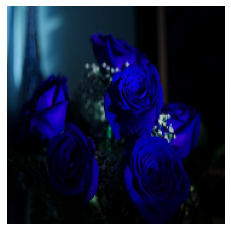

In [57]:
plt.axis('off')
plt.imshow(X[11])

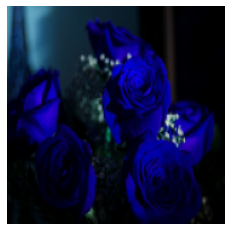

In [58]:
plt.axis('off')
plt.imshow(data_augmentation(X)[11].numpy().astype("uint8"))

In [59]:
data_augmentation = Sequential([
    layers.RandomFlip(
    mode='horizontal',input_shape=(180,180,3)),
    layers.RandomZoom(0.2),
    layers.RandomRotation(0.1),
])

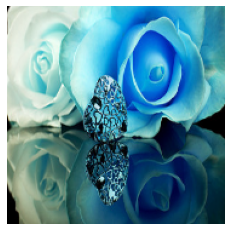

In [60]:
plt.axis('off')
plt.imshow(X[45])

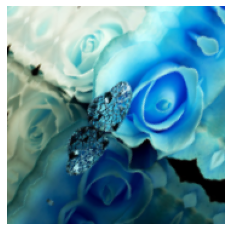

In [61]:
plt.axis('off')
plt.imshow(data_augmentation(X)[45].numpy().astype("uint8"))

In [66]:
model = Sequential([
    #Data_augmentation layers
    data_augmentation,


    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    #using dropout of neurons to overcome overfitting
    layers.Dropout(0.2),

    #2d array to 1d array
    layers.Flatten(),

    #dense network
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(num_classes) #tring default linear activation
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled,y_train,epochs=30)

Epoch 1/30
70/70 [==============================] - 3s 28ms/step - loss: 1.3234 - accuracy: 0.3977
Epoch 2/30
70/70 [==============================] - 2s 27ms/step - loss: 1.0803 - accuracy: 0.5027
Epoch 3/30
70/70 [==============================] - 2s 27ms/step - loss: 0.9913 - accuracy: 0.5799
Epoch 4/30
70/70 [==============================] - 2s 27ms/step - loss: 0.9343 - accuracy: 0.6050
Epoch 5/30
70/70 [==============================] - 2s 27ms/step - loss: 0.8873 - accuracy: 0.6302
Epoch 6/30
70/70 [==============================] - 2s 27ms/step - loss: 0.8465 - accuracy: 0.6499
Epoch 7/30
70/70 [==============================] - 2s 27ms/step - loss: 0.8187 - accuracy: 0.6710
Epoch 8/30
70/70 [==============================] - 2s 27ms/step - loss: 0.7789 - accuracy: 0.6858
Epoch 9/30
70/70 [==============================] - 2s 27ms/step - loss: 0.7675 - accuracy: 0.7015
Epoch 10/30
70/70 [==============================] - 2s 27ms/step - loss: 0.7357 - accuracy: 0.7118
Epoch 11/

In [67]:
model.evaluate(X_test_scaled,y_test)

24/24 [==============================] - 1s 15ms/step - loss: 0.7312 - accuracy: 0.7497


[0.7311944365501404, 0.7496635317802429]